# Clusterização

Identificando transações fraudulentas a partir de vários algoritmos de classificação

### 1 - Importando as bibliotecas

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

%matplotlib inline

import pandas as pd

import warnings
warnings.filterwarnings("ignore")

### 2 - Importando os dados

In [5]:
data_path =  'C:\\Users\\Marcos\\Documents\\datascience_course\\Resumo_Aulas\\dados\\creditcard.csv'

df = pd.read_csv(data_path)

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 3 - Verificando os dados

In [7]:
import seaborn as sns

In [8]:
sns.jointplot

<function seaborn.axisgrid.jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)>

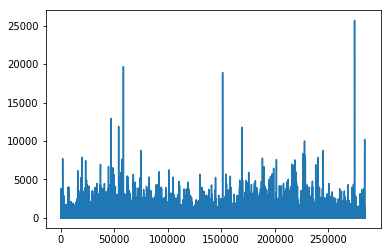

In [9]:
df['Amount'].plot()

In [11]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### 4 - Verificando as frequências de fraudes e não-fraudes

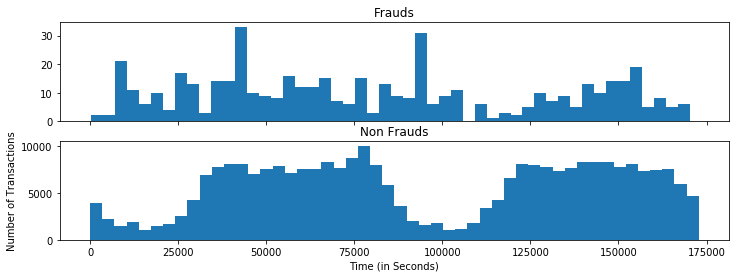

In [15]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Frauds')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Non Frauds')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

### 5 - Separando em duas dimensões apenas para visualização

C:\Users\Marcos\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Marcos\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Marcos\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


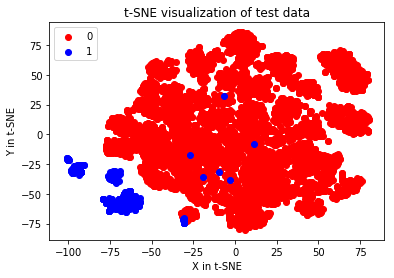

In [16]:
from sklearn.manifold import TSNE

df2 = df[df.Class == 1]
df2 = pd.concat([df2, df[df.Class == 0].sample(n = 10000)], axis = 0)

#Scale features to improve the training ability of TSNE.
standard_scaler = StandardScaler()
df2_std = standard_scaler.fit_transform(df2)

#Set y equal to the target values.
y = df2.ix[:,-1].values

tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(df2_std)

#Build the scatter plot with the two types of transactions.
color_map = {0:'red', 1:'blue'}
plt.figure()
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = x_test_2d[y==cl,0], 
                y = x_test_2d[y==cl,1], 
                c = color_map[idx], 
                label = cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()

### 6 - Criando os dados de treino e teste

In [17]:
def generate_XY_train_test(data, test_size, target_column, mult):
    data=data.reset_index(drop=True)
    data_target = data[data[target_column] == 1]
    data_non_target = data[data[target_column] == 0]
    non_target_index = data_non_target.index
    np.random.seed(27)
    random_indices = np.random.choice(non_target_index, len(data_target)*mult, replace=False)
    data_non_target_sample = data.loc[random_indices]
    final_df = pd.concat([data_target, data_non_target_sample])
    Y=final_df[target_column]
    X=pd.get_dummies(final_df)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=12345, stratify=Y)
    return X_train, X_test, Y_train, Y_test

In [18]:
X_train, X_test, Y_train, Y_Y_test.sum()test = generate_XY_train_test(df, 0.33, 'Class', 1)

print(len(X_train))
print(len(X_test))

659
325


In [23]:
print(Y_train.sum())
print(Y_test.sum())

330
162


### 7 - Rodando os modelos

#### 7.1 Instanciando os modelos

In [24]:
model_knn = KNeighborsClassifier()
model_svc = SVC(probability=True)
model_dtc = DecisionTreeClassifier()
model_rfc = RandomForestClassifier()
model_gnb = GaussianNB()
model_nn = MLPClassifier(hidden_layer_sizes=(100,100,50))

#### 7.2 Treinando os modelos

In [27]:
%time model_knn.fit(X_train, Y_train)
%time model_svc.fit(X_train, Y_train)
%time model_dtc.fit(X_train, Y_train)
%time model_rfc.fit(X_train, Y_train)
%time model_gnb.fit(X_train, Y_train)
%time model_nn.fit(X_train, Y_train)

Wall time: 15.6 ms
Wall time: 228 ms
Wall time: 4 ms
Wall time: 7.38 ms
Wall time: 15.6 ms
Wall time: 358 ms


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

#### 7.3 Fazendo as predições

In [28]:
yhat_knn = model_knn.predict(X_test)
yhat_svc = model_svc.predict(X_test)
yhat_dtc = model_dtc.predict(X_test)
yhat_rfc = model_rfc.predict(X_test)
yhat_gnb = model_gnb.predict(X_test)
yhat_nn = model_nn.predict(X_test)

#### 7.4 Fazendo as predicções com o .predict_proba

In [29]:
yhat_knn_prob = model_knn.predict_proba(X_test)
yhat_svc_prob = model_svc.predict_proba(X_test)
yhat_dtc_prob = model_dtc.predict_proba(X_test)
yhat_rfc_prob = model_rfc.predict_proba(X_test)
yhat_gnb_prob = model_gnb.predict_proba(X_test)
yhat_nn_prob = model_nn.predict_proba(X_test)

#### 7.5 Calculando a ACURÁCIA, RECALL, PRECISION e F1 de cada modelo

In [32]:
classifiers=[[model_knn,'knn'],
             [model_svc,'svc'],
             [model_dtc,'dtc'],
             [model_rfc,'rtc'],
             [model_gnb,'gnb'],
             [model_nn, 'nn']]

knn
Acc: 0.5938461538461538
Precision: 0.5914634146341463
Recall: 0.5987654320987654
F1: 0.5950920245398773


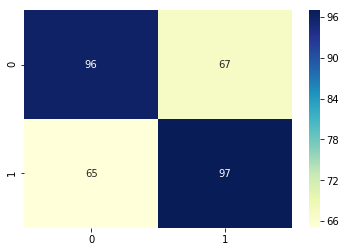

----------------------------------------
svc
Acc: 0.5415384615384615
Precision: 0.9333333333333333
Recall: 0.08641975308641975
F1: 0.15819209039548024


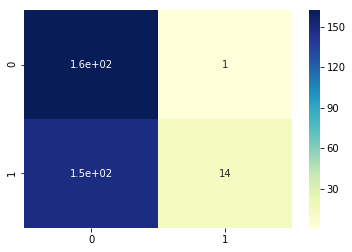

----------------------------------------
dtc
Acc: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


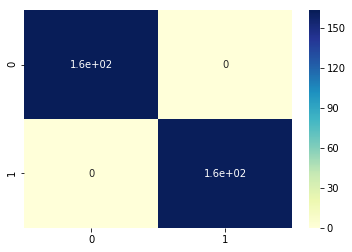

----------------------------------------
rtc
Acc: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


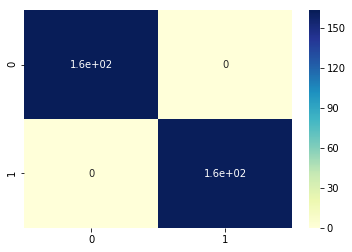

----------------------------------------
gnb
Acc: 0.8892307692307693
Precision: 1.0
Recall: 0.7777777777777778
F1: 0.8750000000000001


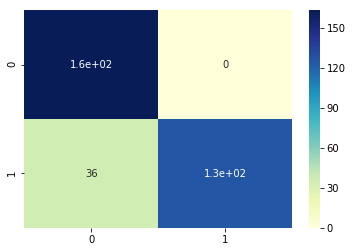

----------------------------------------
nn
Acc: 0.5046153846153846
Precision: 0.6
Recall: 0.018518518518518517
F1: 0.03592814371257485


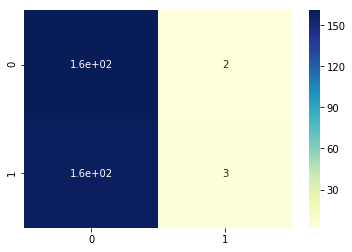

----------------------------------------


In [33]:
from sklearn import metrics
import seaborn as sns

# Recebe os valores reais e os valores preditos e calcula as métricas que estudamos. 
def print_metrics(ytrue, yhat, yhat_prob):
    m1 = metrics.accuracy_score(ytrue, yhat)
    m2 = metrics.precision_score(ytrue, yhat)
    m3 = metrics.recall_score(ytrue, yhat)
    m4 = metrics.f1_score(ytrue, yhat)
    
    print('Acc:', m1)
    print('Precision:', m2 )
    print('Recall:', m3)
    print('F1:', m4)
    
    sns.heatmap(metrics.confusion_matrix(ytrue, yhat, labels=[0,1]),
                annot=True,
                cmap="YlGnBu")
    plt.show()
    
    return [m1,m2,m3,m4]


def train_model(Xtrain, Ytrain, Xtest, model):
    model.fit(Xtrain, Ytrain)
    yhat = model.predict(Xtest)
    yhat_prob = model.predict_proba(Xtest)[:,1]
    return yhat, yhat_prob


metricas = []
probabilidades = []

for classifier, name in classifiers:
    print(name)
    yhat, yhat_prob = train_model(X_train, Y_train, X_test, classifier)
    row = print_metrics(Y_test, yhat, yhat_prob)
    row.append(name)
    metricas.append(row)
    probabilidades.append(yhat_prob)
    print('-'*40)

In [34]:
df_metrics = pd.DataFrame(metricas, columns=['acc',
                                             'precision',
                                             'recall',
                                             'f1',
                                             'classifier'])

df_metrics.set_index('classifier', inplace=True)
df_metrics

,acc,precision,recall,f1
classifier,,,,
knn,0.593846,0.591463,0.598765,0.595092
svc,0.541538,0.933333,0.086420,0.158192
dtc,1.000000,1.000000,1.000000,1.000000
rtc,1.000000,1.000000,1.000000,1.000000
gnb,0.889231,1.000000,0.777778,0.875000
nn,0.504615,0.600000,0.018519,0.035928


### 8 - Lendo o Resultado

In [35]:
n = pd.DataFrame(probabilidades).shape[1]

In [43]:
list(probabilidades)

[array([0.8, 0.2, 0.8, 0.2, 0.8, 0.4, 0.6, 0.4, 0.4, 1. , 1. , 0.6, 1. ,
        0.8, 0.6, 0.4, 0.6, 1. , 0.6, 0.2, 0.2, 0.4, 0.6, 0.4, 1. , 0.2,
        0.6, 0. , 0.2, 0.2, 0.8, 0.8, 0. , 0.4, 0. , 0.8, 0.2, 0.6, 0.8,
        1. , 0.8, 0.2, 0.4, 0.6, 1. , 0.6, 0.6, 0.8, 0.6, 0.2, 0.6, 0.6,
        0.2, 0.6, 1. , 0.4, 0.6, 0.6, 0.8, 0.6, 0.4, 0.4, 0.6, 0.8, 0.6,
        0.8, 0.8, 0. , 0.8, 0.4, 0.2, 0.4, 0.4, 0.8, 0.6, 0.2, 0.6, 1. ,
        0.8, 0.8, 0.4, 1. , 0.4, 0.4, 0.8, 1. , 0.6, 0. , 1. , 0.2, 0.2,
        0. , 0.2, 0.6, 0. , 0.4, 0.4, 0. , 0.2, 1. , 0.8, 0.4, 0. , 0. ,
        0.4, 0.2, 0.8, 0.2, 0.6, 0.4, 0. , 0.4, 1. , 1. , 1. , 0.6, 0.2,
        0.2, 0.2, 0.8, 1. , 0.6, 0.8, 0.4, 0.6, 0.4, 0.6, 0.4, 1. , 0.8,
        0.2, 0.6, 0.6, 0.2, 0.6, 0.6, 0.8, 0.2, 0.2, 0.6, 0.2, 0.4, 0.2,
        0.4, 1. , 1. , 0.4, 1. , 0.4, 0.2, 0.2, 0. , 0.6, 0.6, 0.6, 0.2,
        0.2, 0.8, 0. , 1. , 0.8, 0.2, 0. , 0.4, 1. , 0.6, 0.6, 0.4, 0.4,
        0.2, 0.2, 0. , 0.6, 0.4, 0. , 0.4, 0.4, 0.8

#### 8.1 Transpondo as colunas do frame 'probabilidades' para facilitar a leitura

In [44]:
probabilidades_transposto = np.reshape(probabilidades,(n,6))

In [45]:
df_probs = pd.DataFrame(probabilidades_transposto, columns=df_metrics.index)
df_probs.head(10)

classifier,knn,svc,dtc,rtc,gnb,nn
0,0.8,0.2,0.8,0.2,0.8,0.4
1,0.6,0.4,0.4,1.0,1.0,0.6
2,1.0,0.8,0.6,0.4,0.6,1.0
3,0.6,0.2,0.2,0.4,0.6,0.4
4,1.0,0.2,0.6,0.0,0.2,0.2
5,0.8,0.8,0.0,0.4,0.0,0.8
6,0.2,0.6,0.8,1.0,0.8,0.2
7,0.4,0.6,1.0,0.6,0.6,0.8
8,0.6,0.2,0.6,0.6,0.2,0.6
9,1.0,0.4,0.6,0.6,0.8,0.6


### 9 - Calculando a média das probabilidades

Calculando a média da probabilidade de cada algoritmo = ensamble

In [46]:
# para calcular a média das colunas axis=0, 
# para calcular a média das linhas axis=1

df_probs['media_modelos'] = df_probs.mean(axis=1)

In [47]:
df_probs.head(10)

classifier,knn,svc,dtc,rtc,gnb,nn,media_modelos
0,0.8,0.2,0.8,0.2,0.8,0.4,0.533333
1,0.6,0.4,0.4,1.0,1.0,0.6,0.666667
2,1.0,0.8,0.6,0.4,0.6,1.0,0.733333
3,0.6,0.2,0.2,0.4,0.6,0.4,0.400000
4,1.0,0.2,0.6,0.0,0.2,0.2,0.366667
5,0.8,0.8,0.0,0.4,0.0,0.8,0.466667
6,0.2,0.6,0.8,1.0,0.8,0.2,0.600000
7,0.4,0.6,1.0,0.6,0.6,0.8,0.666667
8,0.6,0.2,0.6,0.6,0.2,0.6,0.466667
9,1.0,0.4,0.6,0.6,0.8,0.6,0.666667


In [48]:
# acrescentando o Y verdadeiro:
df_probs['ytrue'] = Y_test.values

In [49]:
# Ajustando a media dos modelos para classificar como fraude (1) ou não fraude(0)

df_probs['yhat_media'] = df_probs['media_modelos']>0.5
df_probs.head()

classifier,knn,svc,dtc,rtc,gnb,nn,media_modelos,ytrue,yhat_media
0,0.8,0.2,0.8,0.2,0.8,0.4,0.533333,1,True
1,0.6,0.4,0.4,1.0,1.0,0.6,0.666667,0,True
2,1.0,0.8,0.6,0.4,0.6,1.0,0.733333,0,True
3,0.6,0.2,0.2,0.4,0.6,0.4,0.400000,0,False
4,1.0,0.2,0.6,0.0,0.2,0.2,0.366667,1,False


In [50]:
# transformando a coluna yhat_media em número - função nativa do pandas para booleandos

df_probs['yhat_media'] = df_probs['yhat_media'].astype(int)
df_probs.head()

classifier,knn,svc,dtc,rtc,gnb,nn,media_modelos,ytrue,yhat_media
0,0.8,0.2,0.8,0.2,0.8,0.4,0.533333,1,1
1,0.6,0.4,0.4,1.0,1.0,0.6,0.666667,0,1
2,1.0,0.8,0.6,0.4,0.6,1.0,0.733333,0,1
3,0.6,0.2,0.2,0.4,0.6,0.4,0.400000,0,0
4,1.0,0.2,0.6,0.0,0.2,0.2,0.366667,1,0


### 10 - Verificando a ACURÁCIA, RECALL, PRECISION e F1 do modelo final

Acc: 0.5107692307692308
Precision: 0.5172413793103449
Recall: 0.2777777777777778
F1: 0.3614457831325302


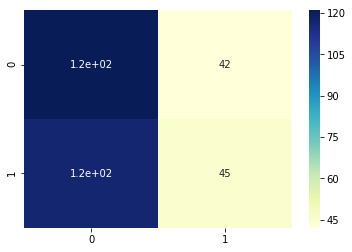

In [51]:
result = print_metrics(ytrue = df_probs['ytrue'],
                        yhat = df_probs['yhat_media'],
                        yhat_prob = df_probs['media_modelos'])

### 11. Analisando a curva ROC

In [53]:
df_probs.describe()

classifier,knn,svc,dtc,rtc,gnb,nn,media_modelos,ytrue,yhat_media
count,3.250000e+02,3.250000e+02,3.250000e+02,3.250000e+02,3.250000e+02,3.250000e+02,3.250000e+02,325.000000,325.000000
mean,4.039232e-01,3.962719e-01,3.954467e-01,4.003450e-01,3.854910e-01,4.239348e-01,4.009021e-01,0.498462,0.267692
std,4.103928e-01,4.082884e-01,4.097955e-01,4.073143e-01,4.030069e-01,4.149985e-01,2.169225e-01,0.500769,0.443439
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.191155e-85,0.000000,0.000000
25%,4.275922e-75,5.634785e-128,5.776621e-82,2.073193e-83,1.483927e-82,1.522104e-53,3.267792e-01,0.000000,0.000000
50%,4.000000e-01,4.000000e-01,4.000000e-01,4.000000e-01,3.000000e-01,4.000000e-01,4.846714e-01,0.000000,0.000000
75%,9.000000e-01,8.000000e-01,8.000000e-01,8.000000e-01,8.000000e-01,9.999268e-01,5.000000e-01,1.000000,1.000000
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.333333e-01,1.000000,1.000000


In [66]:
df_probs[df_probs.ytrue==1].head(5)

classifier,knn,svc,dtc,rtc,gnb,nn,media_modelos,ytrue,yhat_media
0,0.8,0.2,0.8,0.2,0.8,0.4,0.533333,1,1
4,1.0,0.2,0.6,0.0,0.2,0.2,0.366667,1,0
7,0.4,0.6,1.0,0.6,0.6,0.8,0.666667,1,1
10,0.4,0.4,0.6,0.8,0.6,0.8,0.600000,1,1
12,0.4,0.8,0.6,0.2,0.6,1.0,0.600000,1,1


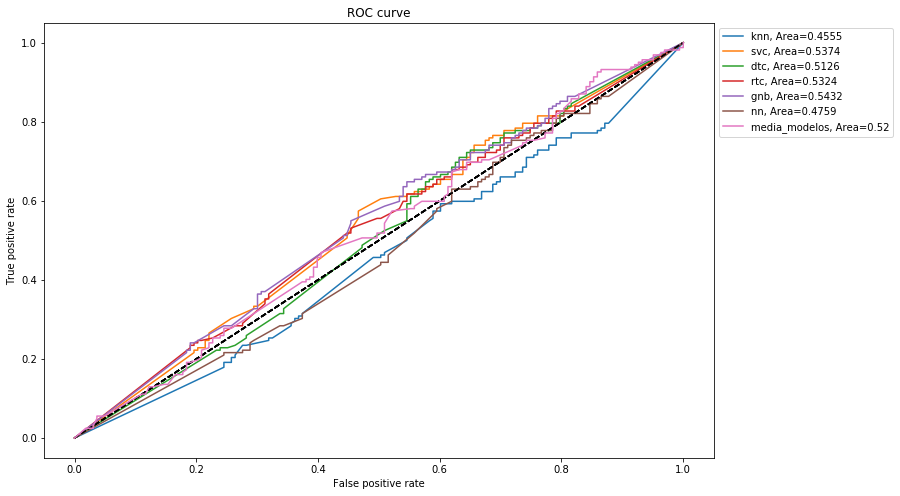

In [65]:
plt.figure(figsize=(12,8))

for model in list(df_probs):
    if 'ytrue' in model or 'yhat_media' in model:
        pass
    else:
        fpr, tpr, _ = metrics.roc_curve(df_probs['ytrue'], df_probs[model])
        auc = metrics.roc_auc_score(df_probs['ytrue'], df_probs[model])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot(fpr, tpr, label=model+', Area='+str(np.round(auc,4)))
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.title('ROC curve')
        plt.legend(bbox_to_anchor=(1.0, 1))

plt.show()